In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import string

C:\Users\Mahesh Pela\AppData\Local\Temp\ipykernel_8016\1547548019.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to C:\Users\Mahesh
[nltk_data]     Pela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!pip install nltk

In [3]:
# Loading the data into the dataframe

df = pd.read_csv(r"D:\PROGRAMMING\Mahesh\Machine Learning\Sentiment Analysis on Amazon reviews\amazon_alexa.tsv", sep='\t')

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
# dropping the null value in the dataset

df.dropna(inplace=True)

In [8]:
# verifying is there any null values exist or not

df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
df.rename(columns ={'verified_reviews':'reviews'}, inplace=True)

In [10]:
df

,rating,date,variation,reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [11]:
# checking the counts of the each rating in the dataset
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [12]:
# here 1 represents the positive feedback and 0 represents the negative feedback
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [13]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [14]:
df['rating'].count()

3149

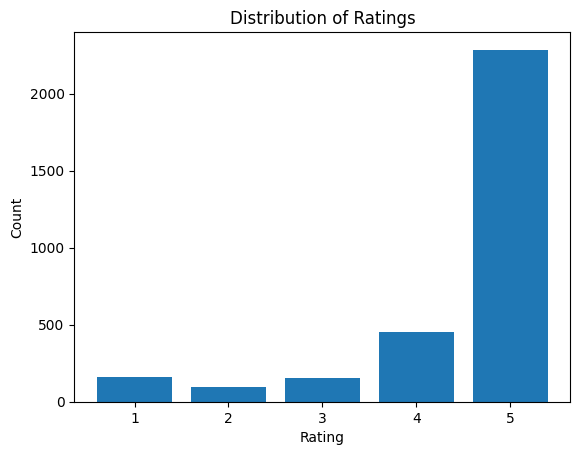

In [15]:
# first counting the unique rating of each ratings and sorting the index in the ascending order 
ratings = df['rating'].value_counts().sort_index()

plt.bar(ratings.index, ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

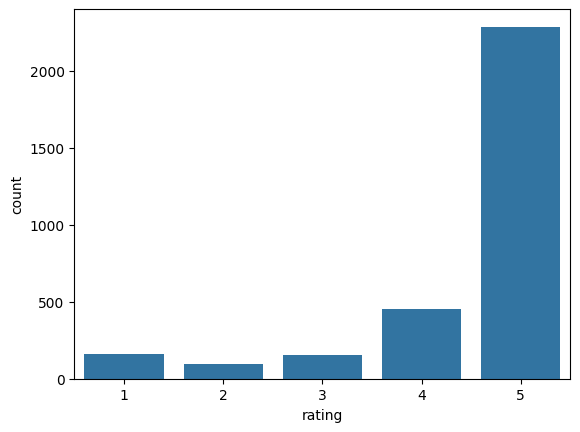

In [16]:
sns.countplot(x=df['rating'])
plt.show()

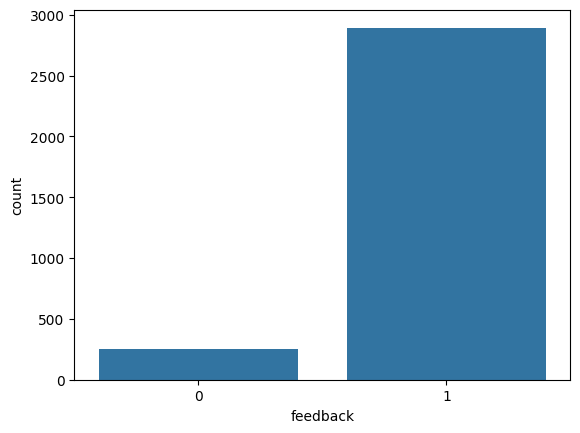

In [17]:
sns.countplot(x=df['feedback'])
plt.show()

**Applying Data Preprocessing**

In [18]:
def process_text(text):
    # Convert the text into lowercase
    text = text.lower()
    
    # Replace URLs with an empty string
    text = re.sub(r"https?\S+|www\S+", '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    text_tokens = word_tokenize(text)
    
    # Define a list of keywords to retain
    important_keywords = ['like', 'worst','not', 'good', 'bad', 'great', 'dislike']  # Add more keywords as needed
    
    # Exclude the important keywords from the set of stopwords
    stopwords_filtered = set(stopwords) - set(important_keywords)
    
    # Remove stopwords from the text tokens
    filtered_text = [w for w in text_tokens if w not in stopwords_filtered]
    
    # Join the filtered_text back into a string separated by space
    return " ".join(filtered_text)



**Training the Model**

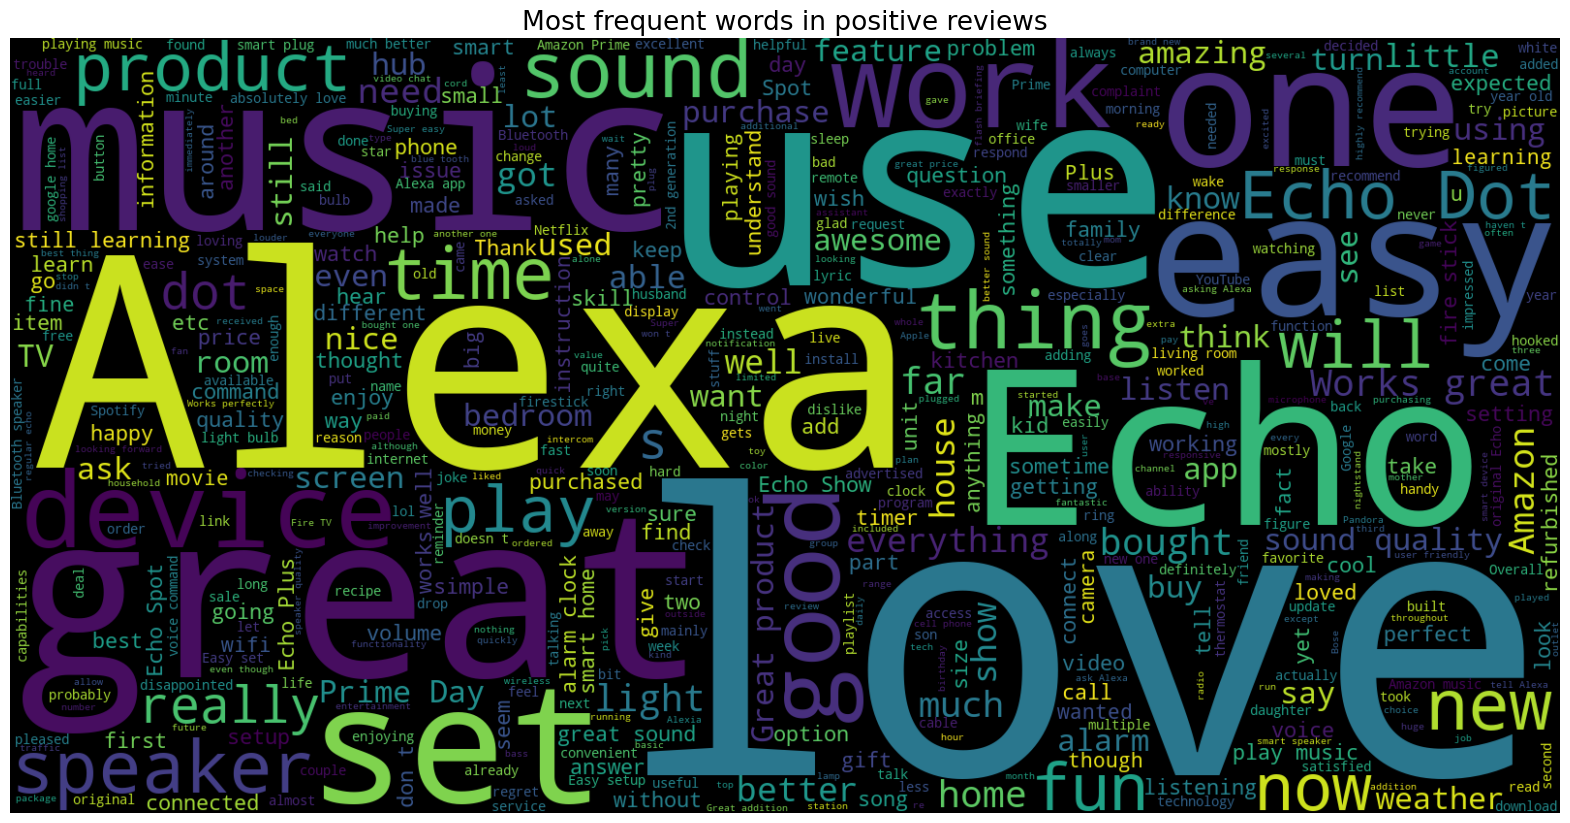

In [41]:
pos_reviews = df[df['feedback'] == 1]
text=' '.join([word for word in pos_reviews['reviews']])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews',fontsize=19)
plt.show()


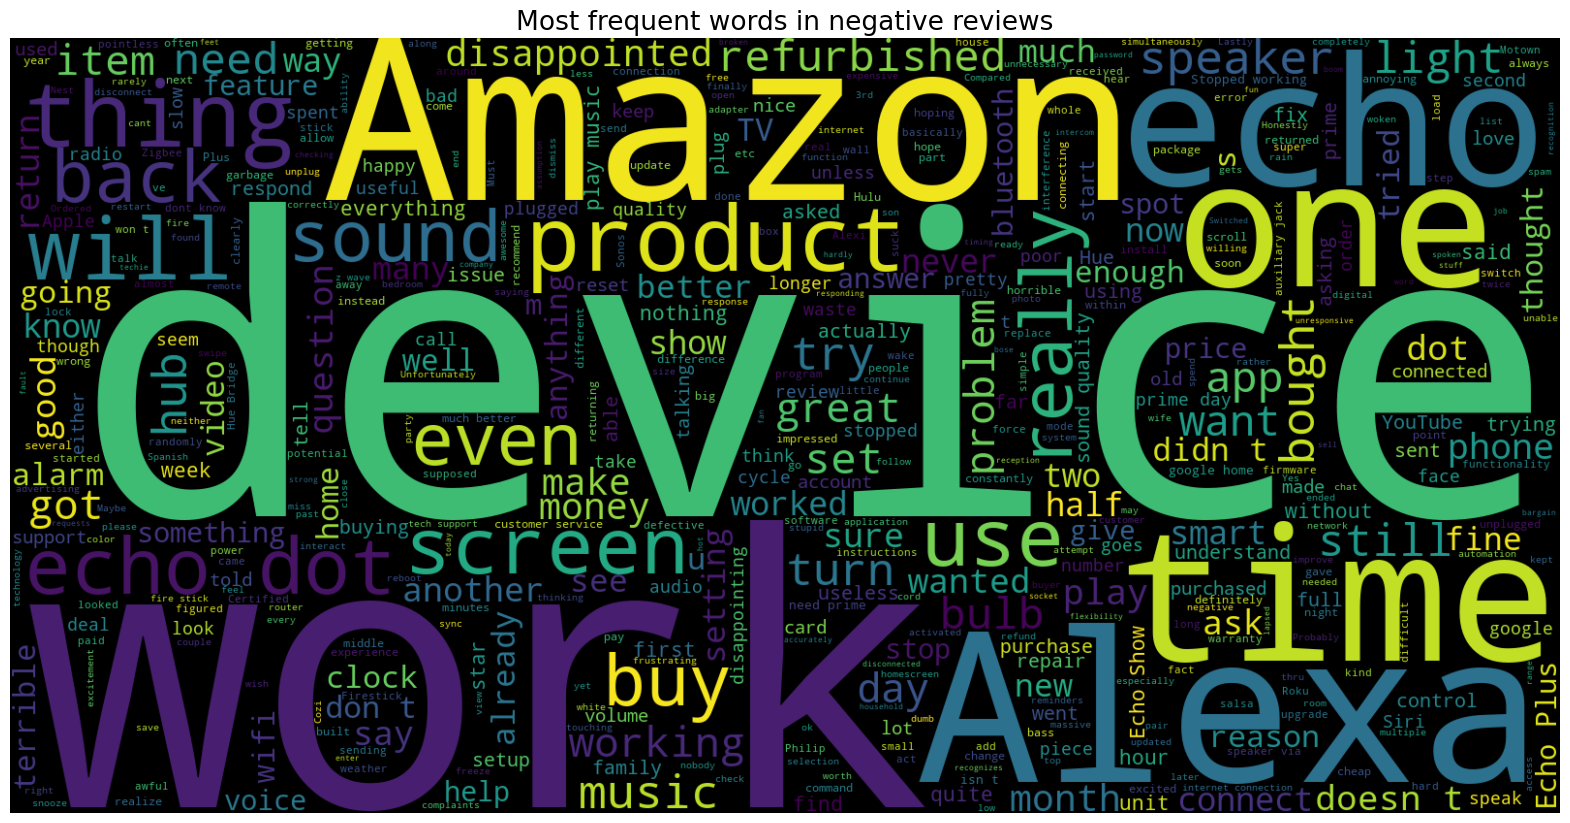

In [43]:
neg_reviews = df[df['feedback'] == 0]
text=' '.join([word for word in neg_reviews['reviews']])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews',fontsize=19)
plt.show()

In [36]:
# independent variable
x = df['reviews']
# dependent variable
y = df['feedback']
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

logisticreg = LogisticRegression()
logisticreg.fit(x_train, y_train)
logistic_pred = logisticreg.predict(x_test)
logistic_acc =accuracy_score(logistic_pred, y_test)
print(logistic_acc)


0.926984126984127


In [48]:
# Define the input data for sentiment analysis
input_text = "Does not work all the time"

# Preprocess the input text using the same data processing function
processed_input = process_text(input_text)

# Vectorize the preprocessed input text using the CountVectorizer
vectorized_input = cv.transform([processed_input])

# Make prediction using the trained Logistic Regression model
predicted_feedback = logisticreg.predict(vectorized_input)

# Map the predicted feedback label to its meaning
feedback_meaning = {0: "Negative", 1: "Positive"}

# Print the input text and the predicted feedback
print("Input Text:", input_text)
print("Processed Input:", processed_input)
print("Predicted Feedback:", feedback_meaning[predicted_feedback[0]])


Input Text: Does not work all the time
Processed Input: not work time
Predicted Feedback: Negative
